# Task 1 - Data Collection

In [ ]:
# Loading libraries for manipulation and visualization of data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Read the file as pandas dataframe

df = pd.read_csv('/content/ecommerce_furniture_dataset_2024.csv')

In [ ]:
# Take a brief look at the data
df.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [ ]:
# Get the dimentions of the dataframe
df.shape

(2000, 5)

In [ ]:
# Get the row names of the dataframe
df.index

RangeIndex(start=0, stop=2000, step=1)

In [ ]:
# Get the columns name of the dataframe
df.columns

Index(['productTitle', 'originalPrice', 'price', 'sold', 'tagText'], dtype='object')

In [ ]:
# Look at basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   2000 non-null   object
 1   originalPrice  487 non-null    object
 2   price          2000 non-null   object
 3   sold           2000 non-null   int64 
 4   tagText        1997 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


# Observations From Task 1

There are 2000 rows and 5 columns in the data, Each row contains the details of sales matrix.

The features in the dataset are:

*   Product and their original and discounted price
*   Sold Units and tagText

# Task 2 - Data Preprocessing

In [ ]:
# Finding null values if any
df.isnull().sum()

,0
productTitle,0
originalPrice,1513
price,0
sold,0
tagText,3


In [ ]:
# Dropping the null values
df.dropna(inplace=True)

In [ ]:
# New dimentions of the dataframe
df.shape

(487, 5)

In [ ]:
# df.drop(['originalPrice'],axis=1,inplace=True)

In [ ]:
df.head()

,productTitle,originalPrice,price,sold,tagText
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...","$1,294.04",$123.4,53,Free shipping
7,"Living Room Furniture, Modern 3-Piece Includin...","$1,474.17",$734.58,5,Free shipping
20,7-piece patio furniture set modular wicker out...,$671.47,$331.24,39,Free shipping


In [ ]:
df['tagText'].nunique()

3

In [ ]:
df['tagText'].value_counts()

,count
tagText,
Free shipping,485
+Shipping: $225.12,1
+Shipping: $2.91,1


In [ ]:
# Replace all values except 'Free shipping' and '+Shipping: $5.09' with 'others'

df['tagText'] = df['tagText'].apply(lambda x: x if x in ['Free shipping', '+Shipping: $5.09'] else 'others')

print(df['tagText'].value_counts())

tagText
Free shipping    485
others             2
Name: count, dtype: int64


# Task 3 - Exploratory Data Analysis (EDA)

<Axes: xlabel='tagText', ylabel='count'>

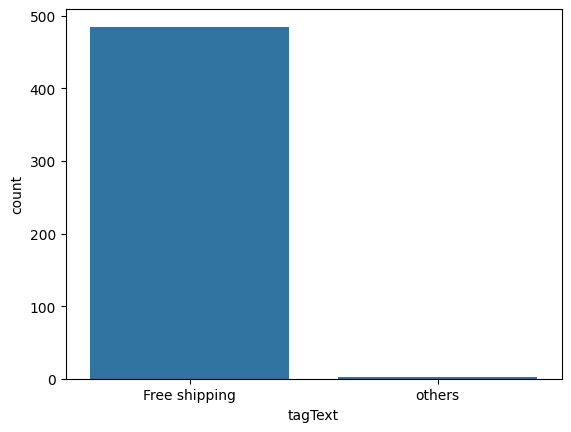

In [ ]:
sns.countplot(x='tagText',data=df)

In [ ]:
df['price'] = df['price'].replace('[$,]','',regex=True).astype(float)
df['originalPrice'] = df['originalPrice'].replace('[$,]','',regex=True).astype(float)
df.head()

,productTitle,originalPrice,price,sold,tagText
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,Free shipping
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...",1294.04,123.40,53,Free shipping
7,"Living Room Furniture, Modern 3-Piece Includin...",1474.17,734.58,5,Free shipping
20,7-piece patio furniture set modular wicker out...,671.47,331.24,39,Free shipping


/tmp/ipython-input-580929635.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


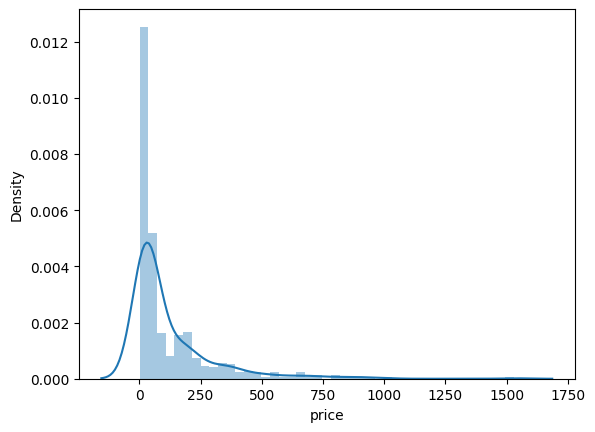

In [ ]:
sns.distplot(df['price'])
plt.show()

/tmp/ipython-input-2507294489.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sold'])


<Axes: xlabel='sold', ylabel='Density'>

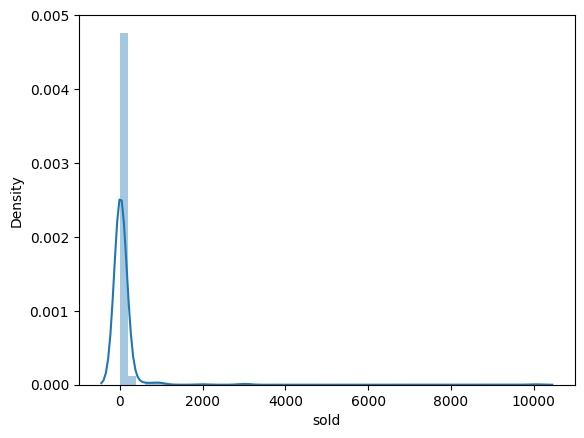

In [ ]:
sns.distplot(df['sold'])

<Axes: xlabel='price', ylabel='sold'>

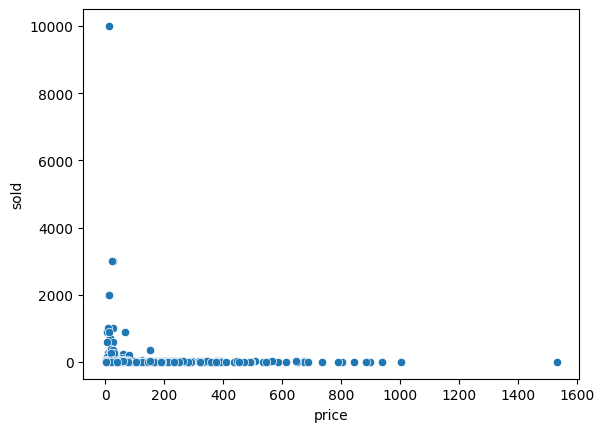

In [ ]:
sns.scatterplot(x='price', y='sold', data=df)

In [ ]:
filtered_df = df[df['tagText'] == 'Free shipping']

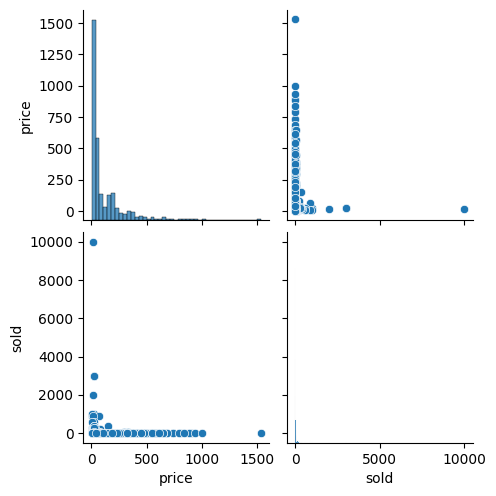

In [ ]:
sns.pairplot(filtered_df[['price', 'sold']])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['tagText']=le.fit_transform(df['tagText'])

In [ ]:
df.head()

,productTitle,originalPrice,price,sold,tagText
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7,0
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,0
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...",1294.04,123.40,53,0
7,"Living Room Furniture, Modern 3-Piece Includin...",1474.17,734.58,5,0
20,7-piece patio furniture set modular wicker out...,671.47,331.24,39,0


In [ ]:
df['tagText'].value_counts()

,count
tagText,
0,485
1,2


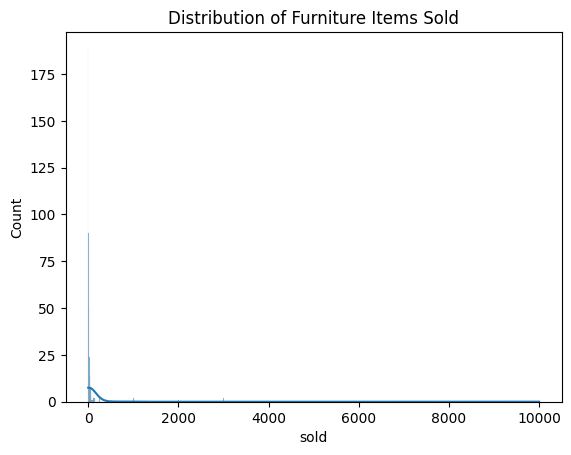

In [ ]:
# Distribution of 'sold' values

sns.histplot(df['sold'], kde=True)
plt.title('Distribution of Furniture Items Sold')
plt.show()

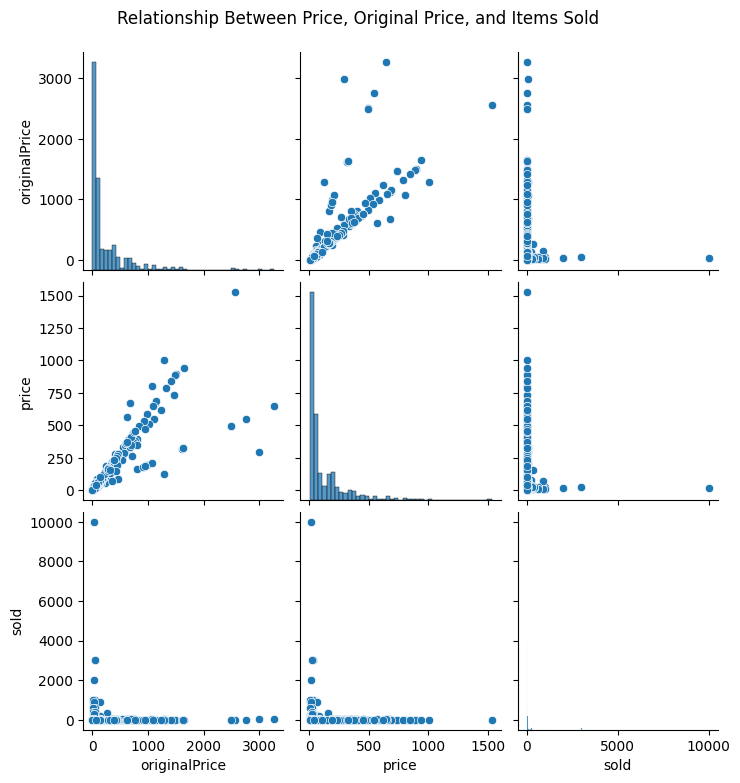

In [ ]:
# Plot the relationship between originalPrice, price and sold
sns.pairplot(df, vars=['originalPrice', 'price', 'sold'],
kind='scatter')
plt.title('Relationship Between Price, Original Price, and Items Sold',y=3.2,x=-0.8)
plt.show()


# 4. Feature Engineering

In [ ]:
# Create a new feature: percentage discount
df['discount_percentage'] = ((df['originalPrice'] -
df['price']) / df['originalPrice']) * 100

In [ ]:
df['discount_percentage']

,discount_percentage
2,49.668367
4,56.226956
5,90.463973
7,50.169926
20,50.669427
...,...
1938,40.637907
1948,24.440824
1955,80.157754
1964,82.530949


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Convert productTitle into a numeric feature using TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=100)
productTitle_tfidf = tfidf.fit_transform(df['productTitle'])

In [ ]:
# Convert to DataFrame and concatenate to original df
productTitle_tfidf_df = pd.DataFrame(productTitle_tfidf.toarray(),
columns = tfidf.get_feature_names_out())
df = pd.concat([df, productTitle_tfidf_df], axis=1)

In [ ]:
# df.head()

In [ ]:
# Drop original productTitle as it's now encoded
# df = df.drop('productTitle', axis=1)

# 5. Data Visualization

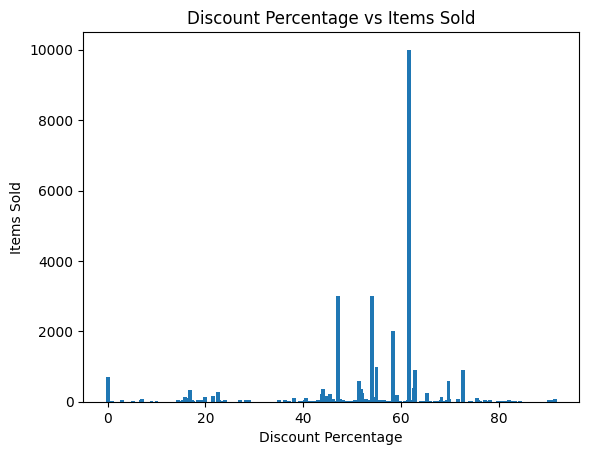

In [ ]:
plt.bar(df['discount_percentage'],df['sold'])
plt.title('Discount Percentage vs Items Sold')
plt.xlabel('Discount Percentage')
plt.ylabel('Items Sold')
plt.show()

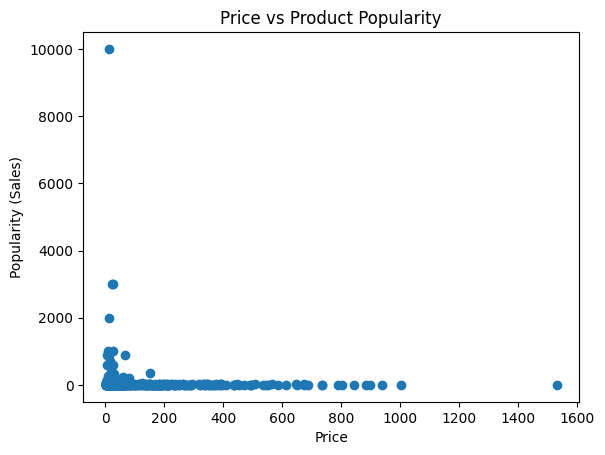

In [ ]:
plt.scatter(df['price'], df['sold'])
plt.xlabel("Price")
plt.ylabel("Popularity (Sales)")
plt.title("Price vs Product Popularity")
plt.show()

In [ ]:
df.head()

,productTitle,originalPrice,price,sold,tagText,discount_percentage
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7.0,0.0,49.668367
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1.0,0.0,56.226956
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...",1294.04,123.40,53.0,0.0,90.463973
7,"Living Room Furniture, Modern 3-Piece Includin...",1474.17,734.58,5.0,0.0,50.169926
20,7-piece patio furniture set modular wicker out...,671.47,331.24,39.0,0.0,50.669427


In [ ]:
df.drop(df.columns[4],axis=1,inplace=True)

In [ ]:
df.head()

,productTitle,originalPrice,price,sold,discount_percentage
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7.0,49.668367
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1.0,56.226956
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...",1294.04,123.40,53.0,90.463973
7,"Living Room Furniture, Modern 3-Piece Includin...",1474.17,734.58,5.0,50.169926
20,7-piece patio furniture set modular wicker out...,671.47,331.24,39.0,50.669427


In [ ]:
df.to_csv("data.csv", index=False)